In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [115]:
file = pd.read_csv('turnover.csv',encoding='ISO-8859-1')
df = pd.DataFrame(file)
df.head(100)

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.889117,1,f,25.0,Consult,HR,youjs,my head,f,white,bus,5.4,6.9,5.7,3.3,2.9
96,3.351129,1,f,24.0,Consult,HR,youjs,no,f,white,bus,4.6,6.9,5.7,5.6,2.9
97,15.310062,1,f,31.0,State,HR,rabrecNErab,no,m,grey,bus,2.2,1.0,8.0,8.7,3.7
98,80.065708,1,f,45.0,Retail,HR,empjs,no,f,white,bus,3.0,5.5,10.0,6.3,2.9


In [116]:
df_objects = df.select_dtypes(include=['object']).copy()
print(df_objects.columns.values,'\n')

for i in df_objects.columns.values:
    print(i,':', df[i].unique(),'\n')

['gender' 'industry' 'profession' 'traffic' 'coach' 'head_gender'
 'greywage' 'way'] 

gender : ['m' 'f'] 

industry : ['Banks' 'PowerGeneration' 'Retail' 'manufacture' 'Consult' 'State' 'etc'
 'Building' 'IT' ' HoReCa' 'Telecom' 'Pharma' 'Mining' 'transport'
 'Agriculture' 'RealEstate'] 

profession : ['HR' 'Commercial' 'Marketing' 'etc' 'Sales' 'BusinessDevelopment'
 'Finanñe' 'Teaching' 'manage' 'IT' 'Law' 'Consult' 'Engineer' 'PR'
 'Accounting'] 

traffic : ['rabrecNErab' 'empjs' 'youjs' 'referal' 'advert' 'KA' 'recNErab'
 'friends'] 

coach : ['no' 'yes' 'my head'] 

head_gender : ['f' 'm'] 

greywage : ['white' 'grey'] 

way : ['bus' 'car' 'foot'] 


In [117]:
df2=df.copy()

print(df2['industry'].unique())

['Banks' 'PowerGeneration' 'Retail' 'manufacture' 'Consult' 'State' 'etc'
 'Building' 'IT' ' HoReCa' 'Telecom' 'Pharma' 'Mining' 'transport'
 'Agriculture' 'RealEstate']


In [118]:
# df2['industry'] = df2['industry'].replace([ 'Agriculture','Mining'],['PrimarySector','PrimarySector'])
# df2['industry'] = df2['industry'].replace([ 'PowerGeneration' ,'manufacture','Building'],['SecondarySector','SecondarySector','SecondarySector'])
# df2['industry'] = df2['industry'].replace([ 'Banks' ,'Retail','Consult','State','IT' ,' HoReCa','Telecom','Pharma','transport','RealEstate','etc'],['TertiarySector','TertiarySector','TertiarySector','TertiarySector','TertiarySector','TertiarySector','TertiarySector','TertiarySector','TertiarySector','TertiarySector','TertiarySector'])

df2['industry'] = df2['industry'].replace(['PowerGeneration', 'manufacture', 'Building', 'Mining', 'Agriculture'],
['GoodsProducing','GoodsProducing','GoodsProducing','GoodsProducing','GoodsProducing'])
df2['industry'] = df2['industry'].replace(['Banks', 'Retail', 'Consult', 'State', 'IT', ' HoReCa', 'Telecom', 'Pharma', 'transport', 'RealEstate', 'etc'], ['ServiceProviding','ServiceProviding','ServiceProviding','ServiceProviding','ServiceProviding','ServiceProviding','ServiceProviding','ServiceProviding','ServiceProviding','ServiceProviding','ServiceProviding'])
                                                                                                                                                           
print(df2['industry'].unique())

['ServiceProviding' 'GoodsProducing']


In [119]:
df2['industry']

0       ServiceProviding
1       ServiceProviding
2         GoodsProducing
3         GoodsProducing
4       ServiceProviding
              ...       
1124    ServiceProviding
1125    ServiceProviding
1126    ServiceProviding
1127    ServiceProviding
1128    ServiceProviding
Name: industry, Length: 1129, dtype: object

In [120]:
print(df2['profession'].unique())

['HR' 'Commercial' 'Marketing' 'etc' 'Sales' 'BusinessDevelopment'
 'Finanñe' 'Teaching' 'manage' 'IT' 'Law' 'Consult' 'Engineer' 'PR'
 'Accounting']


In [139]:
df2['profession'] = df2['profession'].replace(['IT', 'Engineer',  'Finanñe', 'Accounting', 'Law'],['Technical','Technical','Technical','Technical','Technical'])
df2['profession'] = df2['profession'].replace(['HR', 'Commercial', 'Marketing', 'Sales', 'BusinessDevelopment', 'Teaching', 'manage', 'Consult', 'PR','etc']
,['NonTechnical','NonTechnical','NonTechnical','NonTechnical','NonTechnical','NonTechnical','NonTechnical','NonTechnical','NonTechnical','NonTechnical'])
print(df2['profession'].unique())

[0 1]


In [122]:
print(df2['traffic'].unique())


['rabrecNErab' 'empjs' 'youjs' 'referal' 'advert' 'KA' 'recNErab'
 'friends']


In [123]:
df2['traffic'] = df2['traffic'].replace(['advert', 'recNErab', 'referal', 'youjs', 'KA', 'friends'],['EmployeeInitiated','EmployeeInitiated','EmployeeInitiated','EmployeeInitiated','EmployeeInitiated','EmployeeInitiated'])
df2['traffic'] = df2['traffic'].replace(['rabrecNErab', 'empjs'], ['EmployerInitiated','EmployerInitiated'])
print(df2['traffic'].unique())


['EmployerInitiated' 'EmployeeInitiated']


In [124]:
print(df2['coach'].unique())

['no' 'yes' 'my head']


In [125]:
df2['coach'] = df2['coach'].replace(['my head'],['yes'])

print(df2['coach'].unique())

['no' 'yes']


In [126]:
print(df2['way'].unique())

['bus' 'car' 'foot']


In [127]:
df2

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,ServiceProviding,NonTechnical,EmployerInitiated,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,ServiceProviding,NonTechnical,EmployerInitiated,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,GoodsProducing,NonTechnical,EmployerInitiated,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,GoodsProducing,NonTechnical,EmployerInitiated,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,ServiceProviding,NonTechnical,EmployeeInitiated,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,f,41.0,ServiceProviding,NonTechnical,EmployerInitiated,yes,m,white,bus,8.6,3.4,2.6,4.8,8.3
1125,10.611910,0,f,41.0,ServiceProviding,NonTechnical,EmployerInitiated,yes,m,white,bus,8.6,3.4,2.6,4.8,8.3
1126,118.800821,0,f,34.0,ServiceProviding,Technical,EmployeeInitiated,no,f,white,bus,4.6,5.5,7.2,6.3,3.7
1127,49.412731,0,f,51.0,ServiceProviding,NonTechnical,EmployerInitiated,no,m,grey,bus,3.8,7.6,5.7,6.3,5.2


In [128]:
df2_objects = df2.select_dtypes(include=['object']).copy()
print(df2_objects.columns.values,'\n')
print('*'*50,'\n')
for i in df2_objects.columns.values:
    print(i,':', df2[i].unique(),'\n')

['gender' 'industry' 'profession' 'traffic' 'coach' 'head_gender'
 'greywage' 'way'] 

************************************************** 

gender : ['m' 'f'] 

industry : ['ServiceProviding' 'GoodsProducing'] 

profession : ['NonTechnical' 'Technical'] 

traffic : ['EmployerInitiated' 'EmployeeInitiated'] 

coach : ['no' 'yes'] 

head_gender : ['f' 'm'] 

greywage : ['white' 'grey'] 

way : ['bus' 'car' 'foot'] 


In [131]:
df2['gender'] = df2['gender'].replace(['m','f'],[1,0]) # m=1 , f=0
df2['industry'] = df2['industry'].replace(['GoodsProducing','ServiceProviding'],[1,0]) # GoodsProducing=1 , ServiceProviding=0
df2['profession'] = df2['profession'].replace(['Technical','NonTechnical'],[1,0]) # Technical=1 , NonTechnical=0
df2['traffic'] = df2['traffic'].replace(['EmployerInitiated','EmployeeInitiated',],[1,0]) # EmployerInitiated=1 , EmployeeInitiated=0
df2['coach'] = df2['coach'].replace(['yes','no'],[1,0]) # yes=1 , no=0
df2['head_gender'] = df2['head_gender'].replace(['m','f'],[1,0]) # m=1 , f=0
df2['greywage'] = df2['greywage'].replace(['white','grey'],[1,0]) # white=1 , grey=0
df2['way'] = df2['way'].replace(['foot','bus','car'],[0,1,2]) # foot=0 , bus=1 , car=2'

                                 

In [133]:
df2

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,1,35.0,0,0,1,0,0,1,1,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,1,33.0,0,0,1,0,1,1,1,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,0,35.0,1,0,1,0,1,1,1,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,0,35.0,1,0,1,0,1,1,1,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,1,32.0,0,0,0,1,0,1,1,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,0,41.0,0,0,1,1,1,1,1,8.6,3.4,2.6,4.8,8.3
1125,10.611910,0,0,41.0,0,0,1,1,1,1,1,8.6,3.4,2.6,4.8,8.3
1126,118.800821,0,0,34.0,0,1,0,0,0,1,1,4.6,5.5,7.2,6.3,3.7
1127,49.412731,0,0,51.0,0,0,1,0,1,0,1,3.8,7.6,5.7,6.3,5.2


In [78]:
# # from sklearn.preprocessing import OneHotEncoder
# 
# # Instantiate the OneHotEncoder
# ohe = OneHotEncoder()
# 
# # Perform one-hot encoding on the 'industry' column
# industry_encoded = ohe.fit_transform(df2['industry'].values.reshape(-1,1)).toarray()
# 
# # Create a DataFrame from the encoded data
# industry_encoded_df = pd.DataFrame(industry_encoded, columns = ohe.categories_[0])
# 
# # Concatenate the original DataFrame with the encoded DataFrame
# df2_encoded = pd.concat([df2, industry_encoded_df], axis=1)
# 
# # Drop the original 'industry' column
# df2_encoded = df2_encoded.drop(['industry'], axis=1)

In [79]:
# df2_encoded
# df2_encoded.to_csv('df2_encoded.csv', index=False)

,stag,event,gender,age,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator,PrimarySector,SecondarySector,TertiarySector
0,7.030801,1,1,35.0,0,1,0,0,1,1,6.2,4.1,5.7,7.1,8.3,0.0,0.0,1.0
1,22.965092,1,1,33.0,0,1,0,1,1,1,6.2,4.1,5.7,7.1,8.3,0.0,0.0,1.0
2,15.934292,1,0,35.0,0,1,0,1,1,1,6.2,6.2,2.6,4.8,8.3,0.0,1.0,0.0
3,15.934292,1,0,35.0,0,1,0,1,1,1,5.4,7.6,4.9,2.5,6.7,0.0,1.0,0.0
4,8.410678,1,1,32.0,0,0,1,0,1,1,3.0,4.1,8.0,7.1,3.7,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,0,41.0,0,1,1,1,1,1,8.6,3.4,2.6,4.8,8.3,0.0,0.0,1.0
1125,10.611910,0,0,41.0,0,1,1,1,1,1,8.6,3.4,2.6,4.8,8.3,0.0,0.0,1.0
1126,118.800821,0,0,34.0,1,0,0,0,1,1,4.6,5.5,7.2,6.3,3.7,0.0,0.0,1.0
1127,49.412731,0,0,51.0,0,1,0,1,0,1,3.8,7.6,5.7,6.3,5.2,0.0,0.0,1.0


In [134]:
df2.to_csv('df2_encoded.csv', index=False)

In [87]:
import plotly.express as px
df3=df.copy()
df3=df3.drop(['event','gender','coach','head_gender','greywage','way','industry','profession','traffic'], axis=1)
df3

,stag,age,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,35.0,6.2,4.1,5.7,7.1,8.3
1,22.965092,33.0,6.2,4.1,5.7,7.1,8.3
2,15.934292,35.0,6.2,6.2,2.6,4.8,8.3
3,15.934292,35.0,5.4,7.6,4.9,2.5,6.7
4,8.410678,32.0,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...
1124,10.611910,41.0,8.6,3.4,2.6,4.8,8.3
1125,10.611910,41.0,8.6,3.4,2.6,4.8,8.3
1126,118.800821,34.0,4.6,5.5,7.2,6.3,3.7
1127,49.412731,51.0,3.8,7.6,5.7,6.3,5.2


In [90]:
df_corr = df3.corr().round(2)
fig = px.imshow(df_corr, text_auto = True, labels=dict(color="Correlation"), width=600, height=600)
fig.show()

In [93]:
from sklearn.decomposition import PCA
df4 = df2_encoded.copy()
y = df4['event']
df4 = df4.drop(['event'], axis=1)
X= df4
for i in range (0,16):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)
    print(i,'_components', (pca.explained_variance_ratio_).round(2))

0 _components []
1 _components [0.95]
2 _components [0.95 0.04]
3 _components [0.95 0.04 0.01]
4 _components [0.95 0.04 0.01 0.  ]
5 _components [0.95 0.04 0.01 0.   0.  ]
6 _components [0.95 0.04 0.01 0.   0.   0.  ]
7 _components [0.95 0.04 0.01 0.   0.   0.   0.  ]
8 _components [0.95 0.04 0.01 0.   0.   0.   0.   0.  ]
9 _components [0.95 0.04 0.01 0.   0.   0.   0.   0.   0.  ]
10 _components [0.95 0.04 0.01 0.   0.   0.   0.   0.   0.   0.  ]
11 _components [0.95 0.04 0.01 0.   0.   0.   0.   0.   0.   0.   0.  ]
12 _components [0.95 0.04 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
13 _components [0.95 0.04 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
14 _components [0.95 0.04 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
15 _components [0.95 0.04 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.  ]


In [136]:
df5=pd.read_csv('df2_encoded.csv')
df5

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,1,35.0,0,0,1,0,0,1,1,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,1,33.0,0,0,1,0,1,1,1,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,0,35.0,1,0,1,0,1,1,1,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,0,35.0,1,0,1,0,1,1,1,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,1,32.0,0,0,0,1,0,1,1,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,0,41.0,0,0,1,1,1,1,1,8.6,3.4,2.6,4.8,8.3
1125,10.611910,0,0,41.0,0,0,1,1,1,1,1,8.6,3.4,2.6,4.8,8.3
1126,118.800821,0,0,34.0,0,1,0,0,0,1,1,4.6,5.5,7.2,6.3,3.7
1127,49.412731,0,0,51.0,0,0,1,0,1,0,1,3.8,7.6,5.7,6.3,5.2


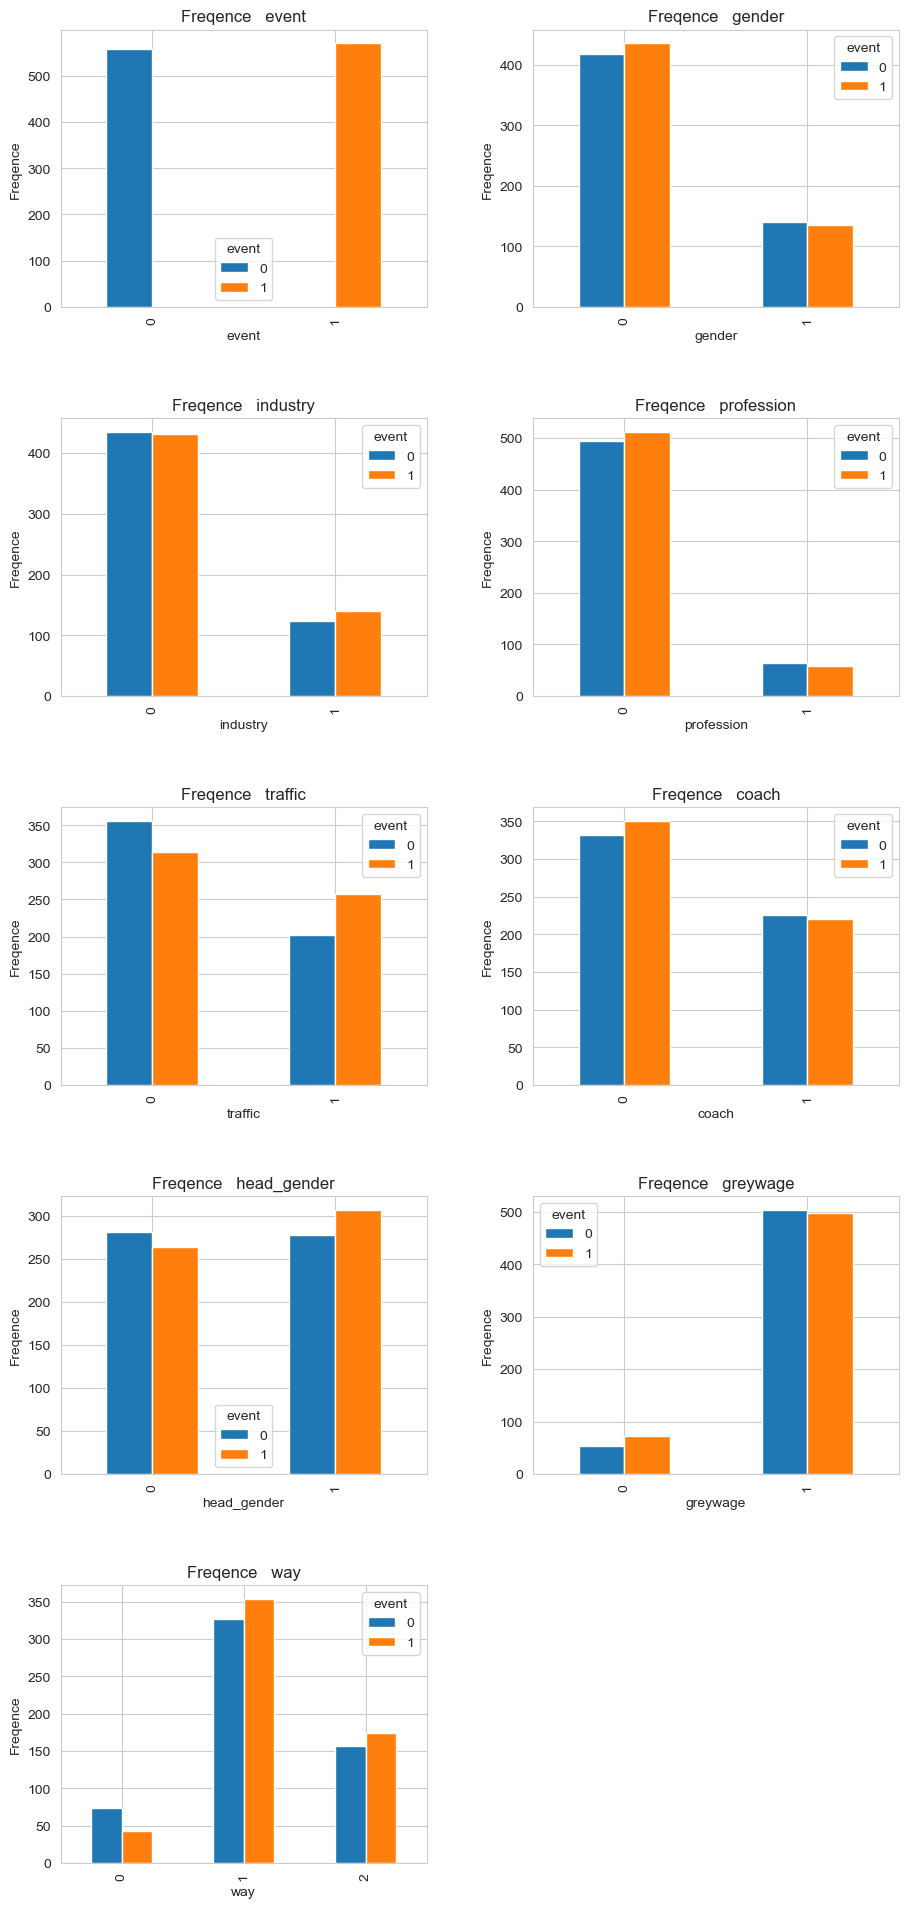

In [152]:
rows    = 5
columns = 2
c       = 1 # Inicializar plot counter
df5_objects = df5.select_dtypes(include=[np.int64])
df5_objects

fig = plt.figure(figsize=(10,20))
for i in df5_objects.columns.values:

    ax = plt.subplot(rows,columns,c)
    pd.crosstab(df5[i],df5.event).plot(kind='bar',ax=ax)
    plt.title('Freqence   {}'.format(i))
    plt.ylabel('Freqence')
    plt.xlabel('{}'.format(i))
    plt.tight_layout(pad=4.0)
    c = c + 1